# cylinder model

## 2D example

import all the packages

In [69]:
import numpy as np

# import sasmodels
import sasmodels
import sasmodels.core
import sasmodels.data
import sasmodels.bumps_model

import sasdata

from sasdata.dataloader.loader import Loader
from sasmodels.data import load_data
#from sas import sascalc.dataloader

import bumps
import bumps.fitters
import bumps.names
import bumps.fitproblem


import os
#import periodictable
#import periodictable.nsf
import tol_colors as tc # colorblind safe color palettes


"""
import matplotlib.pyplot and set custom default settings for plots
"""
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.rc('font', size=14) # default fontsize
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('legend', title_fontsize=14)
plt.rc('figure', titlesize=18)
plt.rc("figure", figsize=(5,5))
plt.rc("lines", linewidth=3)


# use colorblind safe colors:
plt.rc('axes', prop_cycle=plt.cycler('color', list(tc.tol_cset('muted'))))
try:
    plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))
except:
    pass
plt.rc('image', cmap='tc_iridescent')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_8976\2382738225.py:32: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_8976\2382738225.py:49: UserWarning: Trying to register the cmap 'tc_iridescent' which already exists.
  plt.cm.register_cmap('tc_iridescent', tc.tol_cmap('iridescent'))


## Loading of a 2D image

### method using sasmodels.data.Data2D()

* creation of a numpy array by reading the .dat file
* data for fiting are generated using sasmodels.data.Data2D()


In [70]:
filename='./data-exemples/Co12-mes2_fresh_377.dat'

data_np_all = np.loadtxt(filename, skiprows=2)

In [71]:
data_np_all.shape

(69133, 3)

In [78]:
size_all=data_np_all.shape[0]

### reduction of the size of the image by selecting qmax_x and qmax_y values

In [97]:
data_np=[]

qmax_x=0.05
qmax_y=0.1

for i in range(size_all):
    if (-qmax_x)<data_np_all[i][0]<qmax_x and (-qmax_y)<data_np_all[i][1]<qmax_y:
        print(data_np_all[i])
        data_np.append(data_np_all[i])

data_np=np.array(data_np)        

[-0.048166 -0.099154  0.667969]
[-0.048166 -0.096499  0.702148]
[-0.048167 -0.093844  0.779297]
[-0.048167 -0.091189  0.817383]
[-0.048167 -0.088534  0.892578]
[-0.048168 -0.085878  0.951172]
[-0.048168 -0.083223  1.02832 ]
[-0.048168 -0.080568  1.083008]
[-0.048168 -0.077913  1.137695]
[-0.048169 -0.075257  1.239258]
[-0.048169 -0.072602  1.341797]
[-0.048169 -0.069947  1.452148]
[-0.048169 -0.067291  1.447266]
[-0.04817  -0.064636  1.432617]
[-0.04817  -0.06198   1.297852]
[-0.04817  -0.059325  1.128906]
[-0.04817  -0.056669  0.563477]
[-0.04817  -0.054013  0.563477]
[-0.048171 -0.051358  0.563477]
[-0.048171 -0.048702  0.563477]
[-0.048171 -0.046046  2.454102]
[-0.048171 -0.04339   3.498047]
[-0.048171 -0.040735  4.245117]
[-0.048171 -0.038079  4.862305]
[-0.048171 -0.035423  5.40918 ]
[-0.048172 -0.032767  6.135742]
[-0.048172 -0.030111  6.767578]
[-0.048172 -0.027456  7.644531]
[-0.048172 -0.0248    8.594727]
[-0.048172 -0.022144  9.717773]
[-0.048172 -0.019488 10.734375]
[-0.0481

In [98]:
data_np.shape

(2775, 3)

In [99]:
data_np.size

8325

In [100]:
print(data_np.shape[0])
print(data_np.shape[1])

2775
3


### need to add error bars for fiting later
* error bars are defined as 0.1 Intensity values

In [101]:
size=data_np.shape[0]

errors = np.zeros(size)

errors=0.1*data_np[:,2]

In [102]:
data2d = sasmodels.data.Data2D(x=data_np[:,0], y=data_np[:,1], z=data_np[:,2],dx=None,dy=None,dz=errors)

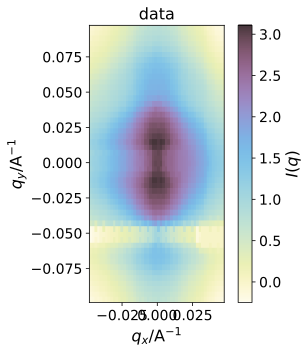

In [103]:
sasmodels.data.plot_data(data2d)

In [104]:
data2d.qx_data

array([-0.048166, -0.048166, -0.048167, ...,  0.047437,  0.047436,
        0.047436])

In [105]:
data2d.qy_data

array([-0.099154, -0.096499, -0.093844, ...,  0.092052,  0.094707,
        0.097362])

In [106]:
data2d.data

array([0.667969, 0.702148, 0.779297, ..., 0.708008, 0.667969, 0.615234])

In [107]:
data2d.err_data

array([0.0667969, 0.0702148, 0.0779297, ..., 0.0708008, 0.0667969,
       0.0615234])

In [108]:
data2d.mask

array([False, False, False, ..., False, False, False])

 class sasmodels.data.Data2D(x: ndarray | None = None, y: ndarray | None = None, z: ndarray | None = None, dx: ndarray | None = None, dy: ndarray | None = None, dz: ndarray | None = None)

    Bases: object

    2D data object.

    Note that this definition matches the attributes from sasview. Some refactoring to allow consistent naming conventions between 1D, 2D and SESANS data would be helpful.

    Attributes

    qx_data, dqx_data: qx

matrix and gaussian resolution

qy_data, dqy_data: qy

matrix and gaussian resolution

data, err_data: I(q)

matrix and measurement uncertainty

mask: values to exclude from plotting/analysis

qmin, qmax: range of q

values in x

filename: label for the data line

_xaxis, _xunit: label and units for the x axis

_yaxis, _yunit: label and units for the y axis

_zaxis, _zunit: label and units for the y axis

Q_unit, I_unit: units for Q and intensity

x_bins, y_bins: grid steps in x and y directions

__annotations__ = {}

__dict__ = mappingproxy({'__module__': 'sasmodels.data', '__doc__': '\n    2D data object.\n\n    Note that this definition matches the attributes from sasview. Some\n    refactoring to allow consistent naming conventions between 1D, 2D and\n    SESANS data would be helpful.\n\n    **Attributes**\n\n    *qx_data*, *dqx_data*: $q_x$ matrix and gaussian resolution\n\n    *qy_data*, *dqy_data*: $q_y$ matrix and gaussian resolution\n\n    *data*, *err_data*: $I(q)$ matrix and measurement uncertainty\n\n    *mask*: values to exclude from plotting/analysis\n\n    *qmin*, *qmax*: range of $q$ values in *x*\n\n    *filename*: label for the data line\n\n    *_xaxis*, *_xunit*: label and units for the *x* axis\n\n    *_yaxis*, *_yunit*: label and units for the *y* axis\n\n    *_zaxis*, *_zunit*: label and units for the *y* axis\n\n    *Q_unit*, *I_unit*: units for Q and intensity\n\n    *x_bins*, *y_bins*: grid steps in *x* and *y* directions\n    ', '__init__': <function Data2D.__init__>, 'xaxis': <function Data2D.xaxis>, 'yaxis': <function Data2D.yaxis>, 'zaxis': <function Data2D.zaxis>, '__dict__': <attribute '__dict__' of 'Data2D' objects>, '__weakref__': <attribute '__weakref__' of 'Data2D' objects>, '__annotations__': {}})

__doc__ = '\n    2D data object.\n\n    Note that this definition matches the attributes from sasview. Some\n    refactoring to allow consistent naming conventions between 1D, 2D and\n    SESANS data would be helpful.\n\n    **Attributes**\n\n    *qx_data*, *dqx_data*: $q_x$ matrix and gaussian resolution\n\n    *qy_data*, *dqy_data*: $q_y$ matrix and gaussian resolution\n\n    *data*, *err_data*: $I(q)$ matrix and measurement uncertainty\n\n    *mask*: values to exclude from plotting/analysis\n\n    *qmin*, *qmax*: range of $q$ values in *x*\n\n    *filename*: label for the data line\n\n    *_xaxis*, *_xunit*: label and units for the *x* axis\n\n    *_yaxis*, *_yunit*: label and units for the *y* axis\n\n    *_zaxis*, *_zunit*: label and units for the *y* axis\n\n    *Q_unit*, *I_unit*: units for Q and intensity\n\n    *x_bins*, *y_bins*: grid steps in *x* and *y* directions\n    '

__init__(x: ndarray | None = None, y: ndarray | None = None, z: ndarray | None = None, dx: ndarray | None = None, dy: ndarray | None = None, dz: ndarray | None = None) → None

__module__ = 'sasmodels.data'

__weakref__

    list of weak references to the object

xaxis(label: str, unit: str) → None

    set the x axis label and unit

yaxis(label: str, unit: str) → None

    set the y axis label and unit

zaxis(label: str, unit: str) → None

    set the y axis label and unit


## create the model for bump fiting

In [109]:
kernel = sasmodels.core.load_model("cylinder")
params = {} # default parameters for now
model = sasmodels.bumps_model.Model(kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

parameters with polydispersity for 2D data

In [110]:
kernel.info.parameters.pd_2d

{'length', 'phi', 'radius', 'theta'}

plot the experiment with manually ajusted values for the parameters

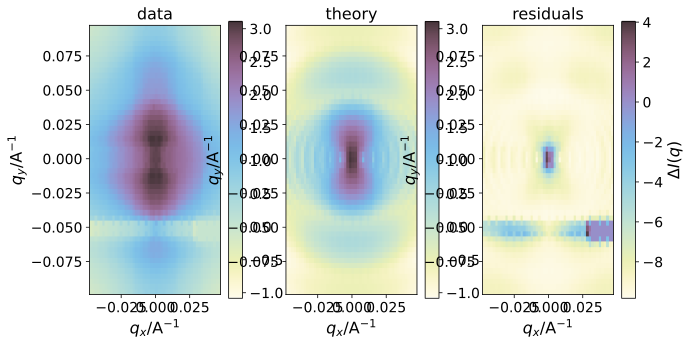

In [125]:
params = {
    "phi": 0, "theta": 90,
    "phi_pd_type": 'gaussian', #polydispersity function
    "phi_pd": 20, #polydispersity
    "phi_pd_n": 60, #number of steps in polydispersity
    "phi_pd_nsigma": 4, #range of polydispersity    
    "radius": 80,
    "radius_pd_type": 'gaussian', #number of steps in polydispersity
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #range of polydispersity
    "length":850,
    "background": 0.000001,
    "scale": 0.08
}
model = sasmodels.bumps_model.Model(model=kernel, **params)
experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

In [112]:
model.state()

{'scale': 1,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 80,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 850,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 90,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 0,
 'phi_pd': 20,
 'phi_pd_n': 60,
 'phi_pd_nsigma': 4,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

* choice of the initial values for parameters
* choice of the fiting parameters with their fiting range

c:\Users\Administrateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sasmodels\bumps_model.py:243: RuntimeWarning: divide by zero encountered in divide
  return (self.theory() - self.Iq) / self.dIq


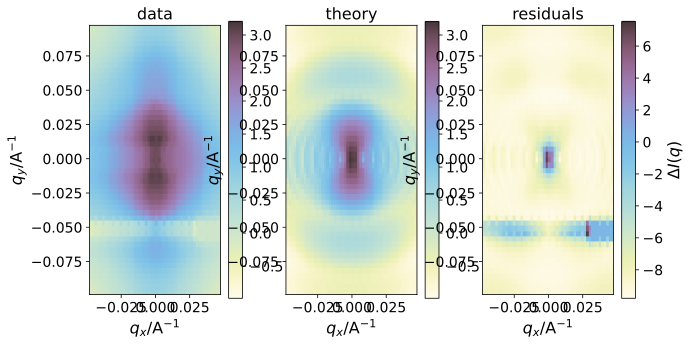

In [137]:
params = {
    "phi": 0, "theta": 90,
    "phi_pd_type": 'gaussian', #polydispersity function
    "phi_pd": 20, #polydispersity
    "phi_pd_n": 60, #number of steps in polydispersity
    "phi_pd_nsigma": 4, #range of polydispersity    
    "radius": 80,
    "radius_pd_type": 'gaussian', #number of steps in polydispersity
    "radius_pd": 0.1, #polydispersity
    "radius_pd_n": 8, #number of steps in polydispersity
    "radius_pd_nsigma": 4, #range of polydispersity
    "length":850,
    "background": 0.000001,
    "scale": 0.1
}
model = sasmodels.bumps_model.Model(model=kernel, **params)

#list of the fiting parameters with their fiting range
model.scale.range(0.05, 0.5)

experiment = sasmodels.bumps_model.Experiment(data=data2d, model=model)

plt.figure(figsize=(10,5))
experiment.plot()

* creation of the fit `problem` 
* `problem` is generated by FitProblem in bump module

In [67]:
problem = bumps.fitproblem.FitProblem(experiment)

* RUN the fit `problem` 

In [68]:
results = bumps.fitters.fit(problem, verbose=True)
plt.figure(figsize=(10, 5))
problem.plot()

step 1 cost inf
step 3 cost inf
step 5 cost inf
step 7 cost inf
step 9 cost inf
step 11 cost inf
step 13 cost inf
step 15 cost inf
step 17 cost inf


c:\Users\Administrateur\AppData\Local\Programs\Python\Python310\lib\site-packages\bumps\simplex.py:220: RuntimeWarning: invalid value encountered in subtract
  and max(abs(fsim[0] - fsim[1:])) <= ftol:


step 19 cost inf
step 21 cost inf
step 23 cost inf
step 25 cost inf
step 27 cost inf
step 29 cost inf
step 31 cost inf
step 33 cost inf
step 35 cost inf
step 37 cost inf
step 39 cost inf
step 41 cost inf
step 43 cost inf
step 45 cost inf
step 47 cost inf
step 49 cost inf
step 51 cost inf
step 53 cost inf
step 55 cost inf
step 57 cost inf
step 59 cost inf
step 61 cost inf
step 63 cost inf
step 65 cost inf
step 67 cost inf
step 69 cost inf
step 71 cost inf
step 73 cost inf
step 75 cost inf
step 77 cost inf
step 79 cost inf
step 81 cost inf
step 83 cost inf
step 85 cost inf
step 87 cost inf
step 89 cost inf
step 91 cost inf
step 93 cost inf
step 95 cost inf
step 97 cost inf
step 99 cost inf
step 101 cost inf
step 103 cost inf
step 105 cost inf
step 107 cost inf
step 109 cost inf
step 111 cost inf


KeyboardInterrupt: 

read different elements

In [14]:
kernel.info.parameters.iq_parameters

[P<sld>, P<sld_solvent>, P<radius>, P<length>]

In [15]:
kernel.info.name

'cylinder'

In [16]:
kernel.info.category

'shape:cylinder'

parameters with polydispersity for 2D data

In [17]:
kernel.info.parameters.pd_2d

{'length', 'phi', 'radius', 'theta'}

parameters for orientation

In [18]:
kernel.info.parameters.orientation_parameters

[P<theta>, P<phi>]

 ### TO DO: look later at function sasmodels.data.plot_theory()

In [19]:
print(problem.summarize())

                                  radius |.........         60 in (60,100)


In [20]:
results.x

array([60.])

In [21]:
results.dx

array([0.00672138])

In [22]:
problem.labels()

['radius']

In [23]:
problem.fitness.model.state()

{'scale': 1,
 'background': 1e-06,
 'sld': 4,
 'sld_solvent': 1,
 'radius': 60.00000000000001,
 'radius_pd': 0.1,
 'radius_pd_n': 8,
 'radius_pd_nsigma': 4,
 'length': 850,
 'length_pd': 0.0,
 'length_pd_n': 35.0,
 'length_pd_nsigma': 3.0,
 'theta': 90,
 'theta_pd': 0.0,
 'theta_pd_n': 35.0,
 'theta_pd_nsigma': 3.0,
 'phi': 0,
 'phi_pd': 20,
 'phi_pd_n': 60,
 'phi_pd_nsigma': 4,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'up_phi': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian',
 'length_pd_type': 'gaussian',
 'theta_pd_type': 'gaussian',
 'phi_pd_type': 'gaussian'}

In [24]:
problem.fitness.theory()

array([0.01479556, 0.0136935 , 0.01580687, ..., 0.01580687, 0.0136935 ,
       0.01479556])

The default optimizer for the bumps fit is the Levenberg-Marquardt method, but there are many available as described in greater detail in the Bumps [documentation](https://bumps.readthedocs.io/en/latest/guide/optimizer.html) with additional fitting options.

For Levenberg-Marquardt, the steps, f(x) tolerance and x tolerance from the GUI options can be set with the `steps`, `ftol` and `xtol` arguments in the `fit` method.

<img src="https://bumps.readthedocs.io/en/latest/_images/fit-lm.png">

*Image source: https://bumps.readthedocs.io/en/latest/guide/optimizer.html*

step 1 cost 1349.091617(25)
                                  radius |.........         60 in (60,100)
final chisq 674.545809(25)
=== Uncertainty from curvature:     name   value(unc.) ===
                                  radius   60.0000(67)    


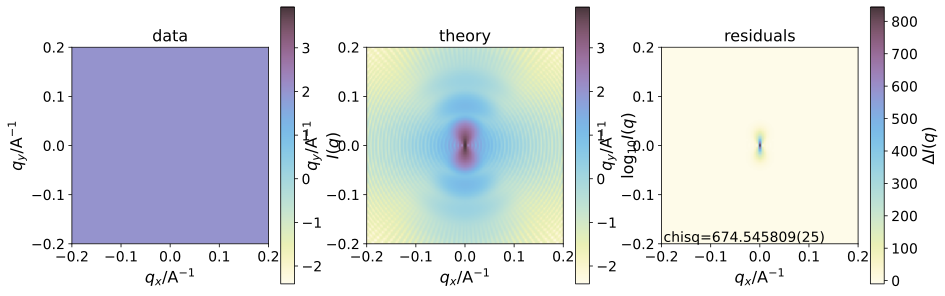

In [25]:
results = bumps.fitters.fit(problem, method='lm', steps=1000, ftol=1.5e-08, xtol=1.5e-08, verbose=True)

plt.figure(figsize=(15,5))
problem.plot()

## Explanation of the polydispersity parameters

The polydispersity is set using a special set of \*\_pd\_\* parameters:
* `*_pd*` is the width of the polydispersity and the exact definition will depend on the type of distribution specified; in this cause of a 'gaussian` distribution, it is defined as as $\frac{\sigma}{x_{mean}}$
* `*_pd_type*` defines the type of polydispersity distribution used
* `*_pd_n` corresponds to the the number of points in the distribution used by the calculation (Npts in the image below)
* `*_pd_nsigma` sets the range of the distribution sampled (Nsigmas in the image below)

For example, radius polydispersity could be defined by specifying **all four** of the pd parameters. With the default values, this would look like:
* `radius_pd = 0`
* `radius_pd_type = 'gaussian'`
* `radius_pd_n = 35`
* `radius_pd_nsigma = 3`

The available polydispersity distributions are defined in the SasView [documentation](https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html) but we can access them directly through the sasmodels `weights` module.

The 'gaussian' distribution is calculated by:

$$
f(x) = \frac{1}{Norm}\exp\left(-\frac{(x-x_{mean})^2}{2\sigma^2}\right)
$$

<img src=https://www.sasview.org/docs/_images/pd_gaussian.jpg>

*Image source: https://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html*
